In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))




Saving OSA_extreme_both.xlsx to OSA_extreme_both (1).xlsx
User uploaded file "OSA_extreme_both.xlsx" with length 26018 bytes


In [48]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = pd.read_excel("OSA_extreme_both.xlsx")
data.OSA = data.OSA.astype("category").cat.codes
X=data[['Gender','BMI','Age','Cervical']]
y=data[['OSA']]
X_features = X.columns

scalerX = StandardScaler()
scalerX.fit(X)
X = pd.DataFrame(scalerX.transform(X))

X=X.values
y = y.values
print(X[0:5])
print(y[0:5])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


[[ 0.68278267 -0.14658954 -0.74133036  0.2257535 ]
 [ 0.68278267 -0.54101462 -1.32278175 -0.09790431]
 [ 0.68278267  0.04704734 -1.32278175  0.38419391]
 [ 0.68278267  0.03297123 -0.74133036  0.38419391]
 [ 0.68278267  3.24186572 -0.07681449  0.86629213]]
[[1]
 [0]
 [0]
 [1]
 [1]]


Kernel: linear Accuracy: 0.724 (0.077)   Precision: 0.681 (0.168)    Recall: 0.602 (0.135)
Kernel: poly Accuracy: 0.686 (0.076)   Precision: 0.757 (0.198)    Recall: 0.338 (0.122)
Kernel: rbf Accuracy: 0.737 (0.075)   Precision: 0.695 (0.155)    Recall: 0.633 (0.107)
Kernel: sigmoid Accuracy: 0.665 (0.087)   Precision: 0.587 (0.166)    Recall: 0.593 (0.141)
C: 0.010 Accuracy: 0.612 (0.089)   Precision: 0.583 (0.484)    Recall: 0.059 (0.066)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined a

C: 0.100 Accuracy: 0.671 (0.075)   Precision: 0.793 (0.226)    Recall: 0.265 (0.111)
C: 1.000 Accuracy: 0.686 (0.076)   Precision: 0.757 (0.198)    Recall: 0.338 (0.122)
C: 10.000 Accuracy: 0.694 (0.079)   Precision: 0.727 (0.193)    Recall: 0.394 (0.135)
C: 100.000 Accuracy: 0.697 (0.082)   Precision: 0.717 (0.198)    Recall: 0.415 (0.126)
C: 1000.000 Accuracy: 0.693 (0.081)   Precision: 0.707 (0.192)    Recall: 0.414 (0.126)


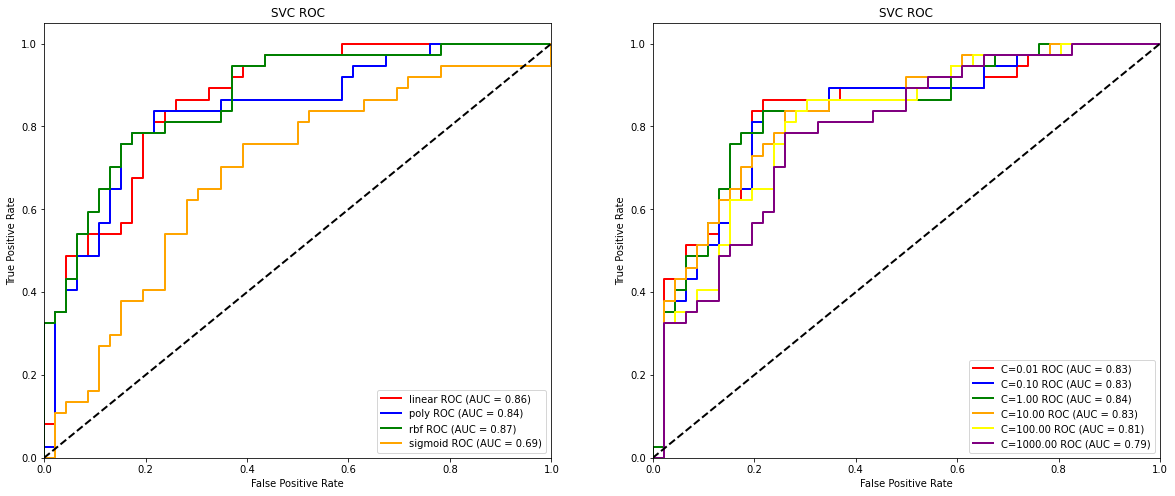

In [58]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from numpy import absolute
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC

scoring = ['accuracy','precision','recall']
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
colors = {'linear':'red','poly':'blue','rbf':'green','sigmoid':'orange'}
plt.figure(figsize=(20, 8))
ax1 = plt.subplot(121)
for kernel in kernels:
  clf = SVC(kernel=kernel,gamma='auto')
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_validate(clf, X, y.ravel(), cv=cv,scoring=scoring)
  print('Kernel: %s Accuracy: %.3f (%.3f)   Precision: %.3f (%.3f)    Recall: %.3f (%.3f)' % (kernel,mean(scores['test_accuracy']), std(scores['test_accuracy']),mean(scores['test_precision']), std(scores['test_precision']),mean(scores['test_recall']), std(scores['test_recall'])))
  y_score = clf.fit(X_train, y_train.ravel()).decision_function(X_test)
  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  n_classes = 2
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test[:], y_score[:])
      roc_auc[i] = auc(fpr[i], tpr[i])
  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

  lw = 2
  ax1.plot(fpr[1], tpr[1], color=colors[kernel],
          lw=lw, label='%s ROC (AUC = %0.2f)' % (kernel,roc_auc[1]))
  ax1.set_xlim([0.0, 1.0])
  ax1.set_ylim([0.0, 1.05])
  ax1.set_xlabel('False Positive Rate')
  ax1.set_ylabel('True Positive Rate')
  ax1.set_title('SVC ROC')
  ax1.legend(loc="lower right")
ax1.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')

ax2 = plt.subplot(122)

cs = [0.01,0.1,1,10,100,1000]
colors = {0.01:'red',0.1:'blue',1:'green',10:'orange',100:'yellow',1000:'purple'}

for c in cs:
  clf = SVC(C=c,kernel='poly',gamma='auto')
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_validate(clf, X, y.ravel(), cv=cv,scoring=scoring)
  print('C: %.3f Accuracy: %.3f (%.3f)   Precision: %.3f (%.3f)    Recall: %.3f (%.3f)' % (c,mean(scores['test_accuracy']), std(scores['test_accuracy']),mean(scores['test_precision']), std(scores['test_precision']),mean(scores['test_recall']), std(scores['test_recall'])))
  y_score = clf.fit(X_train, y_train.ravel()).decision_function(X_test)
  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  n_classes = 2
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test[:], y_score[:])
      roc_auc[i] = auc(fpr[i], tpr[i])
  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

  lw = 2
  ax2.plot(fpr[1], tpr[1], color=colors[c],
          lw=lw, label='C=%.2f ROC (AUC = %0.2f)' % (c,roc_auc[1]))
  ax2.set_xlim([0.0, 1.0])
  ax2.set_ylim([0.0, 1.05])
  ax2.set_xlabel('False Positive Rate')
  ax2.set_ylabel('True Positive Rate')
  ax2.set_title('SVC ROC')
  ax2.legend(loc="lower right")
ax2.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')

plt.show()
